In [ ]:
f=open("/content/ai.ja.txt.parsed","r")

line=f.read()

print(line[20636:21450])#20636:21450

f.close()

* 0 1D 5/7 1.341001
第	接頭詞,数接続,*,*,*,*,第,ダイ,ダイ
２	名詞,数,*,*,*,*,２,ニ,ニ
次	名詞,接尾,助数詞,*,*,*,次,ジ,ジ
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
ブーム	名詞,一般,*,*,*,*,ブーム,ブーム,ブーム
で	助詞,格助詞,一般,*,*,*,で,デ,デ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
* 1 3D 1/2 1.023602
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 2 3D 1/2 2.933990
機械	名詞,一般,*,*,*,*,機械,キカイ,キカイ
学習	名詞,サ変接続,*,*,*,*,学習,ガクシュウ,ガクシュー
と	助詞,格助詞,引用,*,*,*,と,ト,ト
* 3 6D 0/1 -1.316417
呼ば	動詞,自立,*,*,五段・バ行,未然形,呼ぶ,ヨバ,ヨバ
れ	動詞,接尾,*,*,一段,連用形,れる,レ,レ
、	記号,読点,*,*,*,*,、,、,、
* 4 5D 2/3 2.013655
以下	名詞,非自立,副詞可能,*,*,*,以下,イカ,イカ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
よう	名詞,非自立,助動詞語幹,*,*,*,よう,ヨウ,ヨー
な	助動詞,*,*,*,特殊・ダ,体言接続,だ,ナ,ナ
* 5 6D 0/1 -1.316417
もの	名詞,非自立,一般,*,*,*,もの,モノ,モノ
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
* 6 -1D 0/0 0.000000
ある	動詞,自立,*,*,五段・ラ行,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。



In [ ]:
class Morph:
  def __init__(self,node):
    node=node.split("\t")
    feature=node[1].split(",")
    self.surface=node[0]
    self.base=feature[6]
    self.pos=feature[0]
    self.pos1=feature[1]

with open("./ai.ja.txt.parsed","r") as f:
  
  sentences=[]
  morphs=[]

  for line in f.readlines():

    if(line=="\n") or (line[0:2]=="* "):
      continue

    elif line!="EOS\n":
      morphs.append(Morph(line))

    elif len(morphs)!=0:
      sentences.append(morphs)
      morphs=[]

print(len(sentences))

for s in sentences[:7]:
  for m in s:
    print(vars(m))

  print()

83
{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}
{'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}

{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}
{'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}
{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': 'AI', 'base': '*\n', 'pos': '名詞', 'pos1': '一般'}
{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'エーアイ', 'base': '*\n', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '〉', 'base': '〉', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': '）', 'base': '）', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '

In [ ]:
class Chunk:
  def __init__(self,morphs,dst):#这三个变量分别代表了什么？
    self.morphs=morphs
    self.dst=dst
    self.srcs=[]

with open("ai.ja.txt.parsed","r") as f:
  sentences=[]
  morphs=[]
  chunks=[]#组块
  dst=None

  for line in f.readlines():

    if line=="\n":
     continue
    
    elif line[0:2]=="* ":
     if len(morphs)!=0:
       chunks.append(Chunk(morphs,dst))
       morphs=[]
    
     dst=int(line.split(" ")[2][:-1])#这一行中，将"* 0 17D 1/1 0.388993",17写入到dst里边，"['人工', '知能'] 17 []"也就是这里边的17

     
    elif line!="EOS\n":
      morphs.append(Morph(line))#这一行比较好理解，"じん	名詞,一般,*,*,*,*,じん,ジン,ジン"，在这种情况下，直接写到Morphs类就可以了，并且增加到morphs这个列表里边

    elif len(morphs)!=0:#这对应的是什么情况呢？
      chunks.append(Chunk(morphs,dst))

      for i,chunk in enumerate(chunks):#通过枚举，遍历chunk

        if chunk.dst!=-1:
         chunks[chunk.dst].srcs.append(i)#将指向的这个节点的节点保存在srcs变量当中
      
      sentences.append(chunks)

      morphs=[]
      chunks=[]
flag=0      
for chunk in sentences[1]:
  print(
      flag,
      [morph.surface for morph in chunk.morphs],
      chunk.dst,
      chunk.srcs
  )
  flag+=1

0 ['人工', '知能'] 17 []
1 ['（', 'じん', 'こうち', 'のう', '、', '、'] 17 []
2 ['AI'] 3 []
3 ['〈', 'エーアイ', '〉', '）', 'と', 'は', '、'] 17 [2]
4 ['「', '『', '計算'] 5 []
5 ['（', '）', '』', 'という'] 9 [4]
6 ['概念', 'と'] 9 []
7 ['『', 'コンピュータ'] 8 []
8 ['（', '）', '』', 'という'] 9 [7]
9 ['道具', 'を'] 10 [5, 6, 8]
10 ['用い', 'て'] 12 [9]
11 ['『', '知能', '』', 'を'] 12 []
12 ['研究', 'する'] 13 [10, 11]
13 ['計算', '機', '科学'] 14 [12]
14 ['（', '）', 'の'] 15 [13]
15 ['一', '分野', '」', 'を'] 16 [14]
16 ['指す'] 17 [15]
17 ['語', '。'] 34 [0, 1, 3, 16]
18 ['「', '言語', 'の'] 20 []
19 ['理解', 'や'] 20 []
20 ['推論', '、'] 21 [18, 19]
21 ['問題', '解決', 'など', 'の'] 22 [20]
22 ['知的', '行動', 'を'] 24 [21]
23 ['人間', 'に'] 24 []
24 ['代わっ', 'て'] 26 [22, 23]
25 ['コンピューター', 'に'] 26 []
26 ['行わ', 'せる'] 27 [24, 25]
27 ['技術', '」', '、', 'または', '、'] 34 [26]
28 ['「', '計算', '機'] 29 []
29 ['（', 'コンピュータ', '）', 'による'] 31 [28]
30 ['知的', 'な'] 31 []
31 ['情報処理', 'システム', 'の'] 33 [29, 30]
32 ['設計', 'や'] 33 []
33 ['実現', 'に関する'] 34 [31, 32]
34 ['研究', '分野', '」', 'と', 'も'] 35 [17, 27, 33

In [ ]:
def unsign(sentence):
  unsigns=[]

  for chunk in sentence:
    chunk_text=""
    
    for morph in chunk.morphs:

      if morph.pos!="記号":
        chunk_text+=morph.surface

    unsigns.append(chunk_text)
  return unsigns



In [ ]:
sentence_num=1
unsigns=unsign(sentences[sentence_num])

for i,chunk in enumerate(sentences[sentence_num]):
  if chunk.dst!=-1:
    print("\t".join([unsigns[i],unsigns[chunk.dst]]))

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論
推論	問題解決などの
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術または
技術または	研究分野とも
計算機	コンピュータによる
コンピュータによる	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野とも
研究分野とも	される


In [ ]:
def position(sentence):
  poses=[]

  for chunk in sentence:
    chunk_pos=[]
    for morph in chunk.morphs:
      chunk_pos.append(morph.pos)
    poses.append(chunk_pos)
  
  return poses

In [ ]:
sentence_num=1
unsigns=unsign(sentences[sentence_num])
poses=position(sentences[sentence_num])
for i,chunk in enumerate(sentences[sentence_num]):
  if chunk.dst!=-1:
    if ("名詞" in poses[i]) and ("動詞" in poses[chunk.dst]):
     print("\t".join([unsigns[i],unsigns[chunk.dst]]))

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される


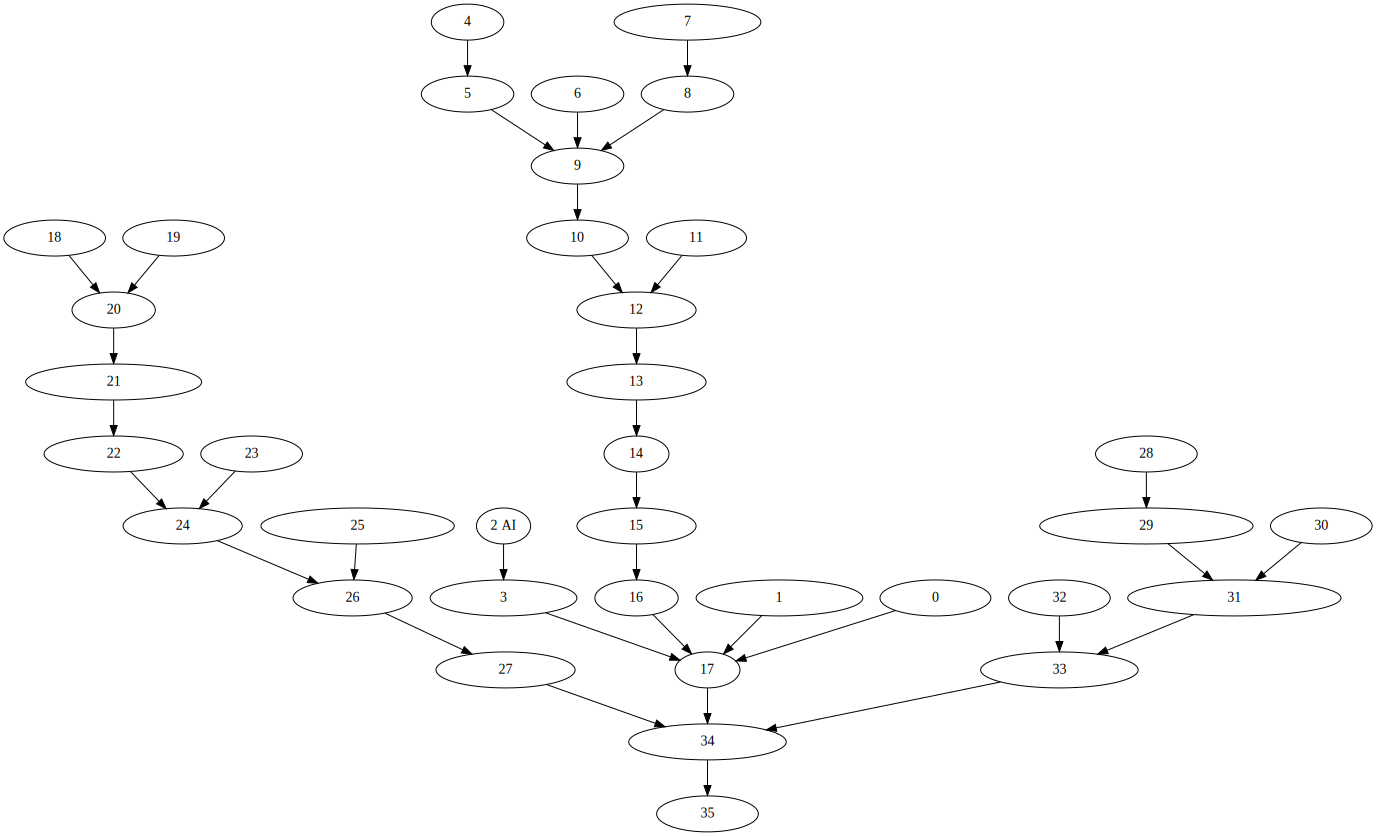

In [ ]:
from graphviz import Digraph

sentence_num=1
unsigns=unsign(sentences[sentence_num])
poses=position(sentences[sentence_num])
g=Digraph(format="png")

for i,chunk in enumerate(sentences[sentence_num]):
  if chunk.dst!=-1:
    depending=str(i)+" "+unsigns[i]
    depended=str(chunk.dst)+" "+unsigns[chunk.dst]

    g.edge(depending,depended)

g

In [ ]:
from codecs import strict_errors
with open("./case.txt","w")as f:
  for sentence in sentences:
    for chunk in sentence:
      for morph in chunk.morphs:#检测chunk的词素中是否含有动词
        if morph.pos=="動詞":
          
          cases=[]
          for src in chunk.srcs:#寻找这个节点指向的节点是否有助词，如果有就加入到case当中
            case = [
                 src_morph.surface 
                 for src_morph 
                 in sentence[src].morphs 
                 if src_morph.pos=="助詞"
                 ]
            cases.extend(case)#将case加入到cases当中
          if len(cases)>0:#如果有搜索结果将这一结果写入case.txt
           cases=" ".join(sorted(cases)) 
           line=morph.base + "\t" + cases + "\n"

           f.write(line)
          break

In [ ]:
!sort ./case.txt |uniq -c | sort -nr | head

    133 する	を
     92 する	て を
     38 する	が が は
     25 ある	が て は は
      9 行う	を
      8 ある	が て て に は
      7 呼ぶ	も
      6 基づく	に
      6 なる	から で と
      6 する	から を


In [ ]:
!cat ./case.txt | grep '行う' | sort | uniq -c | sort -nr | head

      9 行う	を
      4 行う	に を を
      4 行う	て に
      2 行う	が て で に は
      1 行う	まで を
      1 行う	から
      1 行う	に まで を
      1 行う	は を をめぐって
      1 行う	に に により を
      1 行う	が で に は


In [ ]:
!cat ./case.txt | grep 'なる' | sort | uniq -c | sort -nr | head

      9 なる	が と
      5 なる	に
      2 なる	が に に は
      2 なる	に は も
      1 異なる	が で
      1 異なる	も
      1 無くなる	は
      1 なる	から が て で と は
      1 なる	から で と
      1 なる	て として に は


In [ ]:
!cat ./case.txt | grep '与える' | sort | uniq -c | sort -nr | head

      1 与える	が など に
      1 与える	に は を
      1 与える	が に


In [ ]:
from codecs import strict_errors
with open("./case2.txt","w")as f:
  for sentence in sentences:
    
    unsigns=unsign(sentence)

    for chunk in sentence:
      for morph in chunk.morphs:
        if morph.pos=="動詞":
          
          cases=[]
          frames=[]
          
          for src in chunk.srcs:
            case = [
                 src_morph.surface 
                 for src_morph 
                 in sentence[src].morphs 
                 if src_morph.pos=="助詞"
                 ]
         
            cases.extend(case)
            if len(case)>0:
             frames.append(unsigns[src])
            
          if len(cases)>0:
           cases=" ".join(sorted(cases)) 
           frames=" ".join(sorted(frames)) 
           line="\t".join([morph.base,cases,frames])+ "\n"
           f.write(line)
          break          

In [ ]:
!sort ./case2.txt |uniq -c | sort -nr | head

      7 ある	が	ものが
      5 する	を	カウンセラーを
      5 する	を	これらを
      4 する	を	問題を
      3 する	を	研究を
      3 する	が	エキスパートシステムが
      3 なる	と	ニュースと
      2 語る	を	科学を
      2 する	が	研究チームが
      2 扱う	を	データを


In [ ]:
!cat ./case2.txt | head -n 10

用いる	を	道具を
する	て を	用いて 知能を
指す	を	一分野を
代わる	に を	人間に 知的行動を
行う	て に	コンピューターに 代わって
する	と も	研究分野とも
述べる	で に の は	佐藤理史は 次のように 解説で
する	で を	コンピュータ上で 知的能力を
する	を	推論判断を
する	を	画像データを


In [ ]:
def sahen_wo(chunk):
  if len(chunk.morphs)==2:
    sahen=chunk.morphs[0].pos1=="サ変接続"
    wo=chunk.morphs[1].surface=="を"
    return sahen and wo
  return False

In [ ]:
from codecs import strict_errors
with open("./case3.txt","w")as f:
  for sentence in sentences:
   unsigns=unsign(sentence)
   for chunk in sentence:
    for morph in chunk.morphs:
     if morph.pos=="動詞":    
      for src in reversed(chunk.srcs):
       if sahen_wo(sentence[src]):
         sahen_wo_verb = unsigns[src]+morph.base
         cases=[]
         frames=[]
              
         for sahen_src in chunk.srcs:
          if sahen_src==src:
            continue
          case = [
               src_morph.surface 
               for src_morph 
               in sentence[sahen_src].morphs 
               if src_morph.pos=="助詞"
              ]
          cases.extend(case)
            
          if len(case)>0:
           frames.append(unsigns[sahen_src]) 
         if len(cases)>0:
           cases=" ".join(sorted(cases)) 
           frames=" ".join(sorted(frames))
           line="\t".join([sahen_wo_verb,cases,frames])  + "\n"
           f.write(line)
         break   

In [ ]:
def root(sentence):
  unsigns=unsign(sentence)
  poses=position(sentence)
  for i,chunk in enumerate(sentence):
    if "名詞" in poses[i]:
      dst=i
      path=[]
      while dst != -1:
       path.append(unsigns[dst])
       dst=sentence[dst].dst

      print("->".join(path)) 
root(sentences[1])      

人工知能->語->研究分野とも->される
じんこうちのう->語->研究分野とも->される
AI->エーアイとは->語->研究分野とも->される
エーアイとは->語->研究分野とも->される
計算->という->道具を->用いて->研究する->計算機科学->の->一分野を->指す->語->研究分野とも->される
概念と->道具を->用いて->研究する->計算機科学->の->一分野を->指す->語->研究分野とも->される
コンピュータ->という->道具を->用いて->研究する->計算機科学->の->一分野を->指す->語->研究分野とも->される
道具を->用いて->研究する->計算機科学->の->一分野を->指す->語->研究分野とも->される
知能を->研究する->計算機科学->の->一分野を->指す->語->研究分野とも->される
研究する->計算機科学->の->一分野を->指す->語->研究分野とも->される
計算機科学->の->一分野を->指す->語->研究分野とも->される
一分野を->指す->語->研究分野とも->される
語->研究分野とも->される
言語の->推論->問題解決などの->知的行動を->代わって->行わせる->技術または->研究分野とも->される
理解や->推論->問題解決などの->知的行動を->代わって->行わせる->技術または->研究分野とも->される
推論->問題解決などの->知的行動を->代わって->行わせる->技術または->研究分野とも->される
問題解決などの->知的行動を->代わって->行わせる->技術または->研究分野とも->される
知的行動を->代わって->行わせる->技術または->研究分野とも->される
人間に->代わって->行わせる->技術または->研究分野とも->される
コンピューターに->行わせる->技術または->研究分野とも->される
技術または->研究分野とも->される
計算機->コンピュータによる->情報処理システムの->実現に関する->研究分野とも->される
コンピュータによる->情報処理システムの->実現に関する->研究分野とも->される
知的な->情報処理システムの->実現に関する->研究分野とも->される
情報処理システムの->実現に関する->研究分野とも->される
設計や->実現に関する->研究分野と

In [43]:
import re 

def covered_unsign(chunk,character):
  noun=[(morph.surface,morph.pos) if morph.pos !="記号" else ("","") for morph in chunk.morphs]
  noun=[morph[0] if morph[1] !="名詞" else character for morph in noun]
  noun="".join(noun)

  charas=character + "+"
  noun=re.sub(charas, character, noun)
  
  return noun
def noun_path(sentence):
  unsigns=unsign(sentence)
  poses=position(sentence)
  pathes={}
  for i,chunk in enumerate(sentence):
   if "名詞" in poses[i]:
    dst=chunk.dst
    path=[]
    while dst != -1:
     path.append(dst)
     dst=sentence[dst].dst

    pathes[i]=path
  return pathes
def depend_path(sentence):
  unsigns=unsign(sentence)
  pathes=noun_path(sentence)
  for i,chunk in enumerate(sentence):
    if i in pathes.keys():
     i_noun=covered_unsign(chunk,"X")

     for j in range(i+1,len(sentence)):
       if j in pathes.keys():
         if j in pathes[i]:
           out_path=[i_noun]
           for k in pathes[i]:
            if j==k:
              j_noun=covered_unsign(sentence[j],"Y")
              out_path.append(j_noun)

              print("->".join(out_path)) 
            
            out_path.append(unsigns[k])
         else:

           for dst in pathes[j]:
            
             if dst in pathes[i]:
               depending_out=[i_noun]
               j_noun=covered_unsign(sentence[j],"Y")
               depended_out=[j_noun]

               for k in pathes[i]:
                 if k == dst:
                   depending_out="->".join(depending_out)
                   break
                 depending_out.append(unsigns[k])
               for k in pathes[j]:
                 if k == dst:
                   depended_out="->".join(depended_out)
                   break
                 depended_out.append(unsigns[k]) 
               out = " | ".join([depending_out,depended_out,unsigns[dst]])
               print(out)
               break 


In [45]:
depend_path(sentences[1])

X | Yのう | 語
X | Y->エーアイとは | 語
X | Yとは | 語
X | Y->という->道具を->用いて->研究する->計算機科学->の->一分野を->指す | 語
X | Yと->道具を->用いて->研究する->計算機科学->の->一分野を->指す | 語
X | Y->という->道具を->用いて->研究する->計算機科学->の->一分野を->指す | 語
X | Yを->用いて->研究する->計算機科学->の->一分野を->指す | 語
X | Yを->研究する->計算機科学->の->一分野を->指す | 語
X | Yする->計算機科学->の->一分野を->指す | 語
X | Y->の->一分野を->指す | 語
X | Yを->指す | 語
X->Y
X->語 | Yの->推論->問題解決などの->知的行動を->代わって->行わせる->技術または | 研究分野とも
X->語 | Yや->推論->問題解決などの->知的行動を->代わって->行わせる->技術または | 研究分野とも
X->語 | Y->問題解決などの->知的行動を->代わって->行わせる->技術または | 研究分野とも
X->語 | Yなどの->知的行動を->代わって->行わせる->技術または | 研究分野とも
X->語 | Yを->代わって->行わせる->技術または | 研究分野とも
X->語 | Yに->代わって->行わせる->技術または | 研究分野とも
X->語 | Yに->行わせる->技術または | 研究分野とも
X->語 | Yまたは | 研究分野とも
X->語 | Y->コンピュータによる->情報処理システムの->実現に関する | 研究分野とも
X->語 | Yによる->情報処理システムの->実現に関する | 研究分野とも
X->語 | Yな->情報処理システムの->実現に関する | 研究分野とも
X->語 | Yの->実現に関する | 研究分野とも
X->語 | Yや->実現に関する | 研究分野とも
X->語 | Yに関する | 研究分野とも
X->語->Yとも
Xのう | Y->エーアイとは | 語
Xのう | Yとは | 語
Xのう | Y->という->道具を->用いて->研究する->計算機科学->の->一分野を->指す | 語
Xのう | Yと->道